In [1]:
#!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import warnings
warnings.filterwarnings('ignore')

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Task 1

In [3]:
df1 = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv', parse_dates=['date'])
print(df1.shape)
df1.head()

(1462, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df_train = df1.set_index('date')
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_train1 = df_train.copy()
df_train1.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
df_train = df_train['meantemp']
df_train

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [7]:
df2 = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv', parse_dates=['date'])                  # loading data
print(df2.shape)
df2.head()

(114, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [8]:
df_test = df2.set_index('date')
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [9]:
df_test = df_test['meantemp']
df_test

date
2017-01-01    15.913043
2017-01-02    18.500000
2017-01-03    17.111111
2017-01-04    18.700000
2017-01-05    18.388889
                ...    
2017-04-20    34.500000
2017-04-21    34.250000
2017-04-22    32.900000
2017-04-23    32.875000
2017-04-24    32.000000
Name: meantemp, Length: 114, dtype: float64

In [10]:
df_train.info()
df_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Series name: meantemp
Non-Null Count  Dtype  
--------------  -----  
1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Series name: meantemp
Non-Null Count  Dtype  
--------------  -----  
114 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


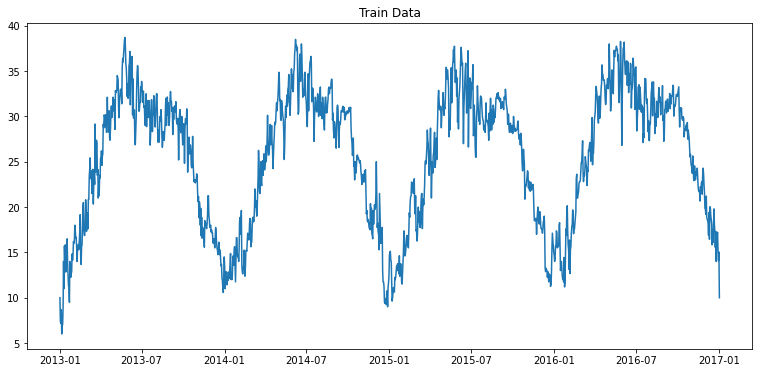

In [11]:
plt.subplots(figsize=(13,6))
plt.plot(df_train)
plt.title('Train Data')
plt.show()

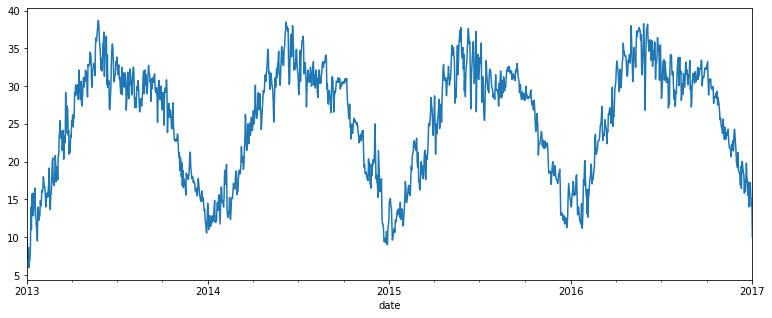

In [12]:
    df_train.plot(figsize=(13, 5))
    plt.show()

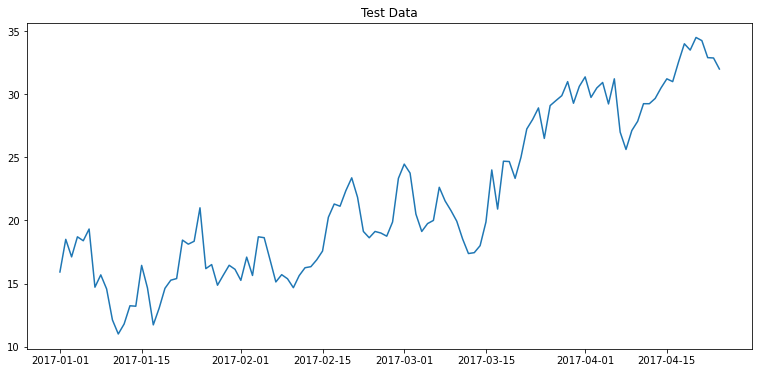

In [13]:
plt.subplots(figsize=(13,6))
plt.plot(df_test)
plt.title('Test Data')
plt.show()

In [14]:
lags = 20
moving_avg = df_train1.rolling(window=lags).mean()

df_ts = pd.DataFrame({'Actual':df_train1['meantemp'], 'MA':moving_avg['meantemp']})
df_ts

,Actual,MA
date,,
2013-01-01,10.000000,NaN
2013-01-02,7.400000,NaN
2013-01-03,7.166667,NaN
2013-01-04,8.666667,NaN
2013-01-05,6.000000,NaN
...,...,...
2016-12-28,17.217391,17.603602
2016-12-29,15.238095,17.394674
2016-12-30,14.095238,17.277213


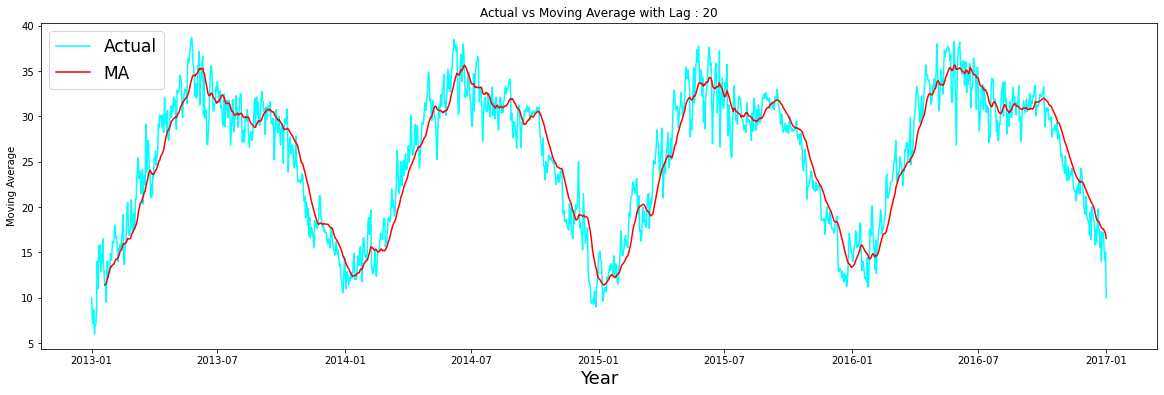

In [15]:
plt.figure(figsize=(20,6))
plt.plot(df_ts.Actual, color='cyan', label='Actual')
plt.plot(df_ts.MA,  color='red', label='MA')
plt.title('Actual vs Moving Average with Lag : ' +str(lags))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Moving Average')
plt.legend(fontsize = 17)
plt.show()

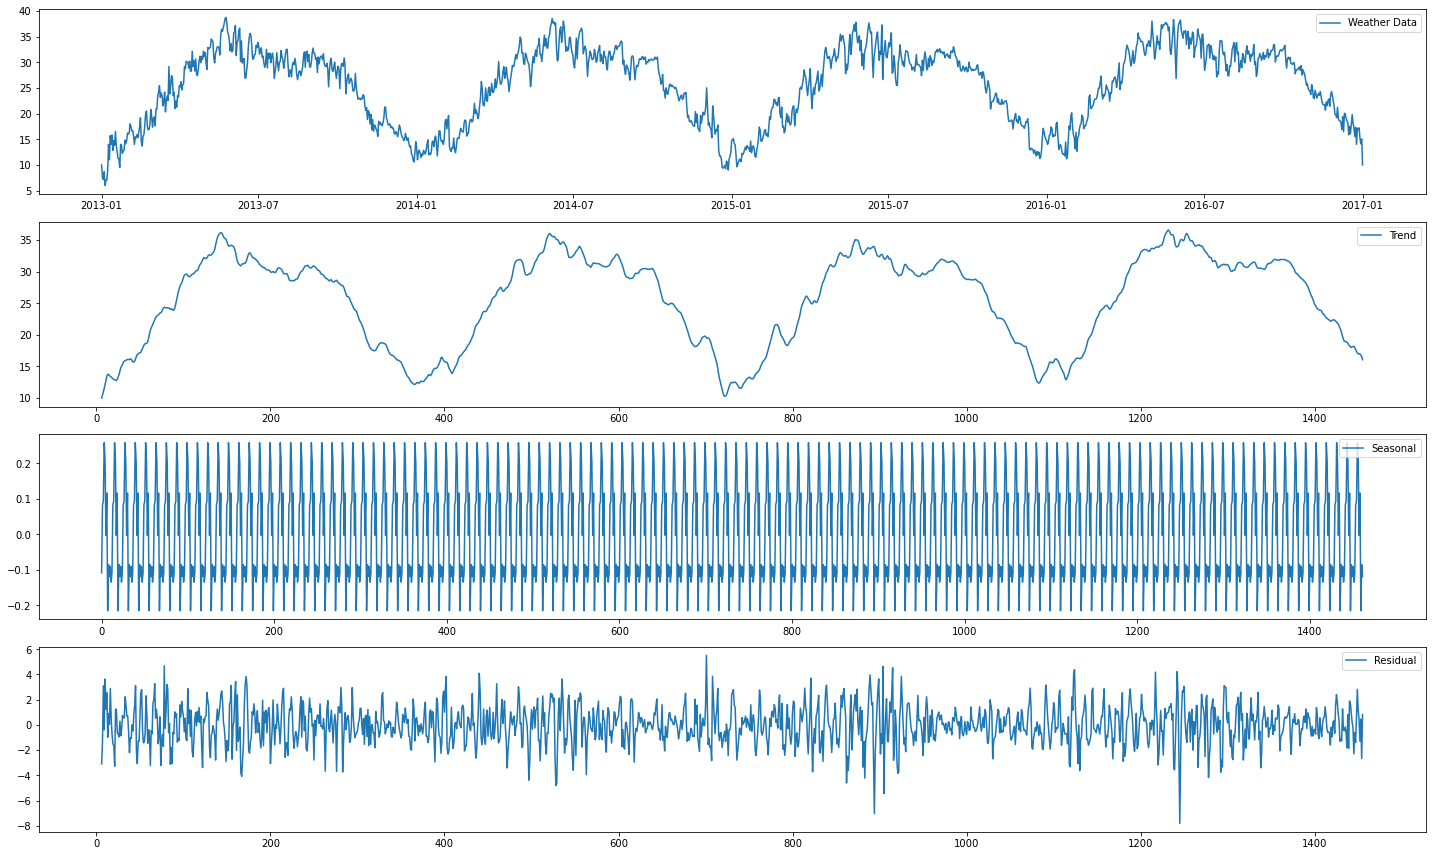

In [16]:
decomposition = seasonal_decompose(np.asarray(df_train), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df_train,label='Weather Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [17]:
def simplesmoothing(data, alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha, optimized=False)
    pdt = model.fittedvalues
    df_new = pd.DataFrame({'actual':data, 'forecast':pdt})
    return(model, df_new)

In [18]:
d_simple_exp = {}
alpha = [0, 0.2, 0.6, 0.8]

for i in alpha:
    model, df_new = simplesmoothing(df_train, i)
    d_simple_exp[i] = df_new.forecast

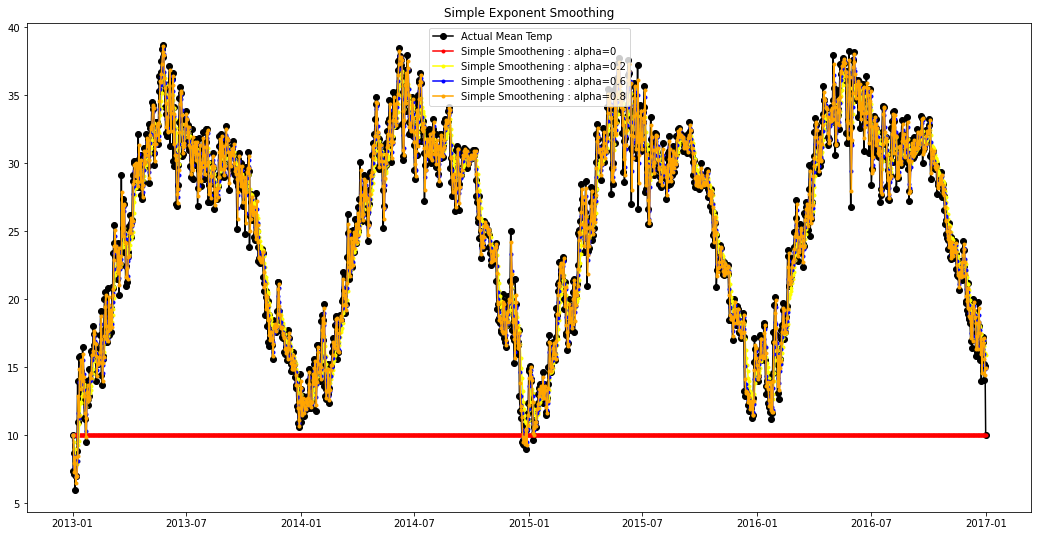

In [19]:
color = ['red','yellow','blue','orange']

fig, ax = plt.subplots(figsize=(18,9))

plt.plot(df_train, marker='o', color='black',label='Actual Mean Temp')
for i in range(len(alpha)):
    plt.plot(d_simple_exp[alpha[i]],marker='.',color=color[i],label='Simple Smoothening : alpha=' + str(alpha[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()    
plt.show()

## Task 2

In [20]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    return msg

In [21]:
print(checkStationarity(df_train))

pvalue=0.27741213723016056. Data is not Stationary. Make the data stationary before model building


In [22]:
diff_df = df_train - df_train.shift()                 # another way -> diff_df = df_train.diff()
print(diff_df) 

date
2013-01-01         NaN
2013-01-02   -2.600000
2013-01-03   -0.233333
2013-01-04    1.500000
2013-01-05   -2.666667
                ...   
2016-12-28    0.367391
2016-12-29   -1.979296
2016-12-30   -1.142857
2016-12-31    0.957393
2017-01-01   -5.052632
Name: meantemp, Length: 1462, dtype: float64


In [23]:
print('Before removing numm values : ',len(diff_df))
diff_df.dropna(inplace=True)
print('After removing null value : ',len(diff_df))
diff_df

Before removing numm values :  1462
After removing null value :  1461


date
2013-01-02   -2.600000
2013-01-03   -0.233333
2013-01-04    1.500000
2013-01-05   -2.666667
2013-01-06    1.000000
                ...   
2016-12-28    0.367391
2016-12-29   -1.979296
2016-12-30   -1.142857
2016-12-31    0.957393
2017-01-01   -5.052632
Name: meantemp, Length: 1461, dtype: float64

In [24]:
print(checkStationarity(diff_df))

pvalue=2.7648631375945265e-29. Data is Stationary. Proceed to model building


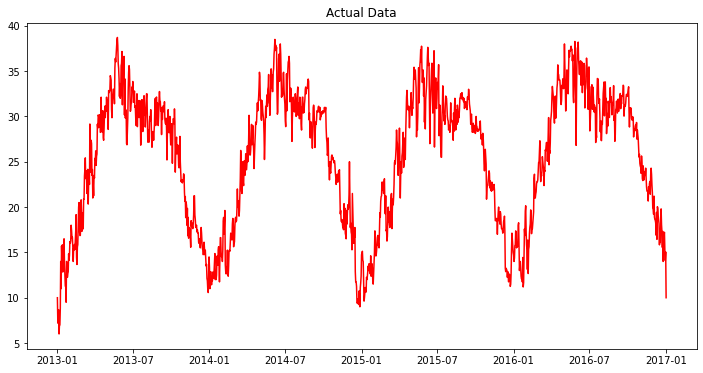

In [25]:
plt.subplots(figsize=(12,6))
plt.plot(df_train, color='red')   
plt.title('Actual Data')
plt.show()

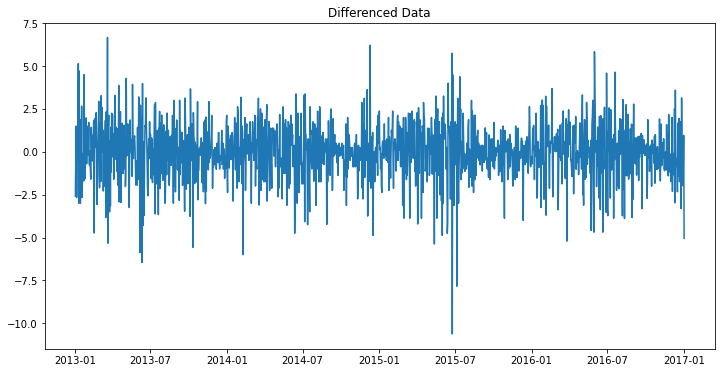

In [26]:
plt.subplots(figsize=(12,6))
plt.plot(diff_df)  
plt.title('Differenced Data')
plt.show()

## Task 3

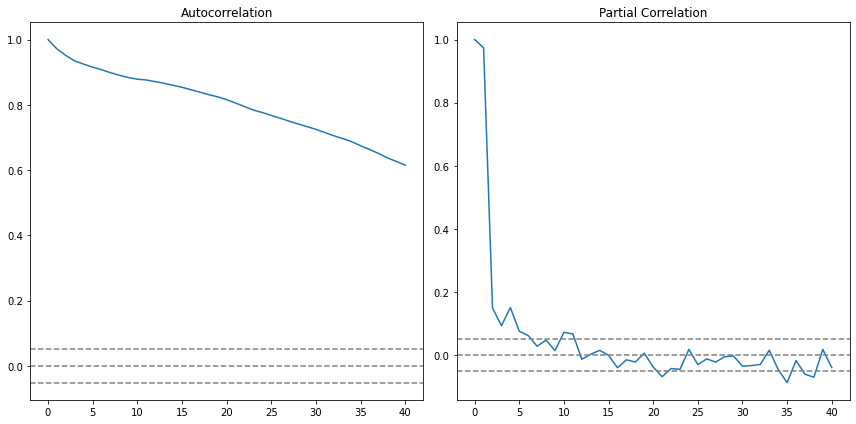

In [27]:
lag_pcf = acf(df_train, nlags=40)
lag_pacf = pacf(df_train, nlags=40, method='ols')

# For ACF
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(df_train)), linestyle='--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_train)), linestyle='--', color='gray')

plt.title('Autocorrelation')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(df_train)), linestyle='--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_train)), linestyle='--', color='gray')

plt.title('Partial Correlation')
plt.tight_layout()
plt.show()


In [28]:
p=1; q=1
m1 = ARIMA(df_train, order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2797.106
Date:                Wed, 27 Apr 2022   AIC                           5602.211
Time:                        10:48:49   BIC                           5623.361
Sample:                    01-01-2013   HQIC                          5610.101
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1435      2.192     11.013      0.000      19.847      28.440
ar.L1          0.9862      0.004    227.285      0.000       0.978       0.995
ma.L1         -0.2057      0.021     -9.820      0.0

In [35]:
p=3; q=2
m1 = ARIMA(df_train, order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2771.449
Date:                Wed, 27 Apr 2022   AIC                           5556.898
Time:                        10:59:16   BIC                           5593.911
Sample:                    01-01-2013   HQIC                          5570.705
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3545     58.693      0.432      0.666     -89.682     140.391
ar.L1          0.8112      0.276      2.936      0.003       0.270       1.353
ar.L2          0.6610      0.405      1.630      0.1

In [29]:
prediction = m1.predict(0, len(df_test)-1)
print(prediction)

2013-01-01    24.143534
2013-01-02    10.321105
2013-01-03     8.209102
2013-01-04     7.615522
2013-01-05     8.664420
                ...    
2013-04-20    28.591097
2013-04-21    30.116930
2013-04-22    28.122064
2013-04-23    27.484018
2013-04-24    28.328291
Freq: D, Name: predicted_mean, Length: 114, dtype: float64


In [30]:
actual=[]; pred=[]

for i in range(len(prediction)):
    actual.append(df_test[i])
    pred.append(prediction[i])

df_res = pd.DataFrame({'Actual':actual , 'Predicted':pred})
df_res['Error'] = df_res['Actual'] - df_res['Predicted']
df_res

,Actual,Predicted,Error
0,15.913043,24.143534,-8.230490
1,18.500000,10.321105,8.178895
2,17.111111,8.209102,8.902009
3,18.700000,7.615522,11.084478
4,18.388889,8.664420,9.724469
...,...,...,...
109,34.500000,28.591097,5.908903
110,34.250000,30.116930,4.133070
111,32.900000,28.122064,4.777936
112,32.875000,27.484018,5.390982


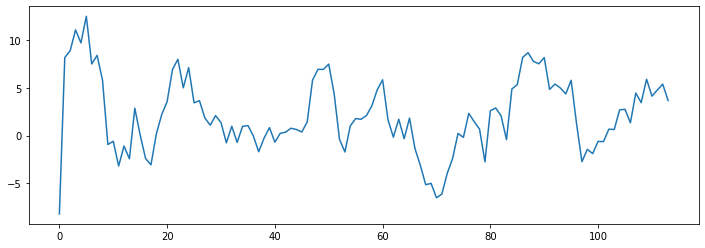

In [31]:
plt.subplots(figsize=(12,4))
plt.plot(df_res.Error)
plt.show()

In [32]:
print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(df_res.Actual, df_res.Predicted)

print("MSE : ",mse)
print('RMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 1 , 1 )
MSE :  19.588943097147936
RMSE :  4.425939798183877


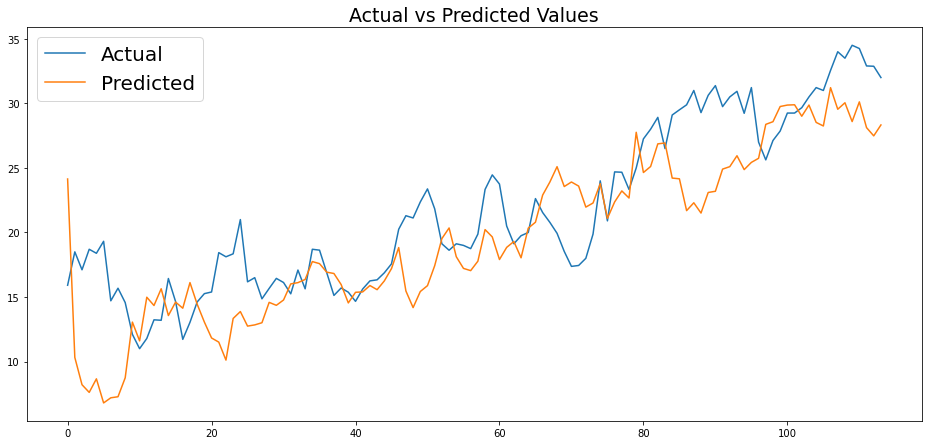

In [33]:
plt.subplots(figsize=(13,6))
plt.plot(df_res.Actual, label='Actual')  
plt.plot(df_res.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.title('Actual vs Predicted Values', fontsize=19)
plt.show()